In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def calculate_ratios(img):
    b, g, r = cv2.split(img)
    total_pixels = img.shape[0] * img.shape[1]
    red_ratio = np.sum(r) / total_pixels
    green_ratio = np.sum(g) / total_pixels
    blue_ratio = np.sum(b) / total_pixels
    return red_ratio, green_ratio, blue_ratio

In [3]:
input_folder = 'C:\\Users\\diwak\\Downloads\\Black INK Orig\\Original'

In [4]:
red_ratios = []
green_ratios = []
blue_ratios = []

In [5]:
image_paths = sorted([os.path.join(input_folder, image) for image in os.listdir(input_folder) if image.endswith('.tif')])

In [6]:
for i in range(0, len(image_paths), 10):
    batch_red_ratios = []
    batch_green_ratios = []
    batch_blue_ratios = []

    # Iterate through images in the batch
    for j in range(i, min(i + 10, len(image_paths))):
        img = cv2.imread(image_paths[j])
        red_ratio, green_ratio, blue_ratio = calculate_ratios(img)
        batch_red_ratios.append(red_ratio)
        batch_green_ratios.append(green_ratio)
        batch_blue_ratios.append(blue_ratio)

    # Append mean ratios for the batch to the main lists
    red_ratios.append(batch_red_ratios)
    green_ratios.append(batch_green_ratios)
    blue_ratios.append(batch_blue_ratios)


In [7]:
red_df = pd.DataFrame(red_ratios, columns=[f'Red_{i+1}' for i in range(10)])
green_df = pd.DataFrame(green_ratios, columns=[f'Green_{i+1}' for i in range(10)])
blue_df = pd.DataFrame(blue_ratios, columns=[f'Blue_{i+1}' for i in range(10)])

In [8]:
red_stats = red_df.describe()
green_stats = green_df.describe()
blue_stats = blue_df.describe()

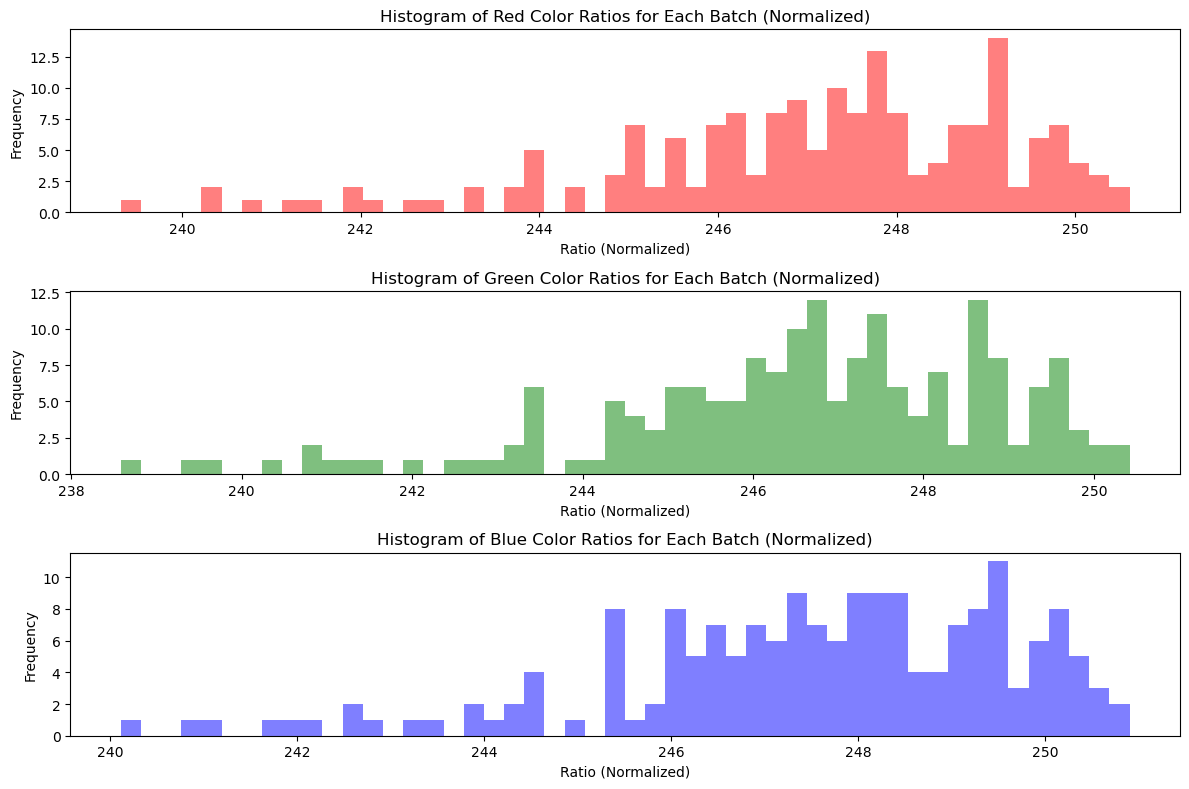

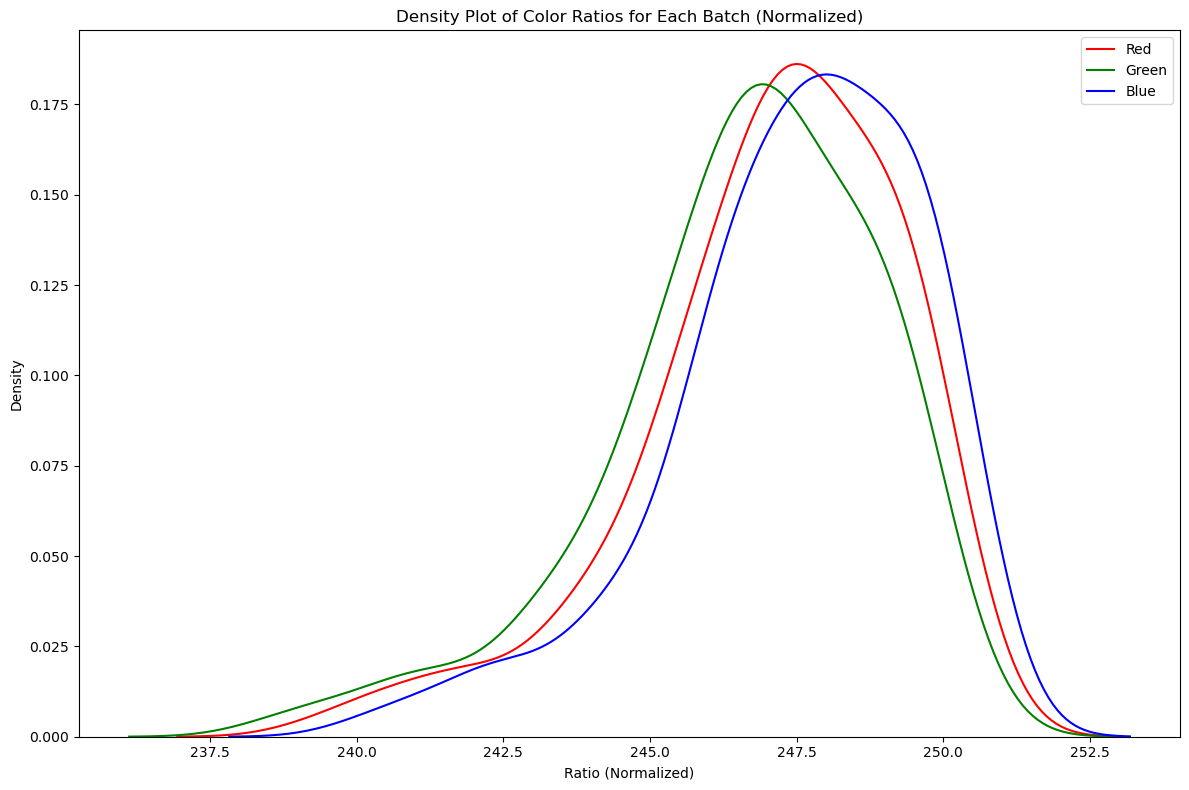

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each color channel separately
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.hist(red_df.values.flatten(), bins=50, color='red', alpha=0.5)
plt.title('Histogram of Red Color Ratios for Each Batch (Normalized)')
plt.xlabel('Ratio (Normalized)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(green_df.values.flatten(), bins=50, color='green', alpha=0.5)
plt.title('Histogram of Green Color Ratios for Each Batch (Normalized)')
plt.xlabel('Ratio (Normalized)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(blue_df.values.flatten(), bins=50, color='blue', alpha=0.5)
plt.title('Histogram of Blue Color Ratios for Each Batch (Normalized)')
plt.xlabel('Ratio (Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Combined density plot
plt.figure(figsize=(12, 8))
sns.kdeplot(red_df.values.flatten(), color='red', label='Red')
sns.kdeplot(green_df.values.flatten(), color='green', label='Green')
sns.kdeplot(blue_df.values.flatten(), color='blue', label='Blue')
plt.title('Density Plot of Color Ratios for Each Batch (Normalized)')
plt.xlabel('Ratio (Normalized)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
print("Red channel statistical features:")
print(red_stats)
print("\nGreen channel statistical features:")
print(green_stats)
print("\nBlue channel statistical features:")
print(blue_stats)

Red channel statistical features:
            Red_1       Red_2       Red_3       Red_4       Red_5       Red_6  \
count   18.000000   18.000000   18.000000   18.000000   18.000000   18.000000   
mean   246.813725  247.126113  247.061076  247.173844  247.315317  247.508621   
std      2.453671    2.168954    2.469107    1.693874    1.932757    1.922418   
min    239.312730  241.458768  241.256513  242.614710  243.271239  242.897996   
25%    246.079528  246.408488  246.360447  246.291558  246.005872  246.706938   
50%    247.384347  247.316874  247.387932  247.362576  247.398617  247.783399   
75%    248.498269  249.005548  248.617640  248.243117  248.839989  248.844205   
max    249.733667  249.848027  250.422055  249.663007  250.605731  250.002376   

            Red_7       Red_8       Red_9      Red_10  
count   18.000000   18.000000   18.000000   18.000000  
mean   247.035244  247.666152  246.289052  246.553909  
std      2.399817    1.683156    2.821068    2.661457  
min    242.1